/home/peterr/mambaforge/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


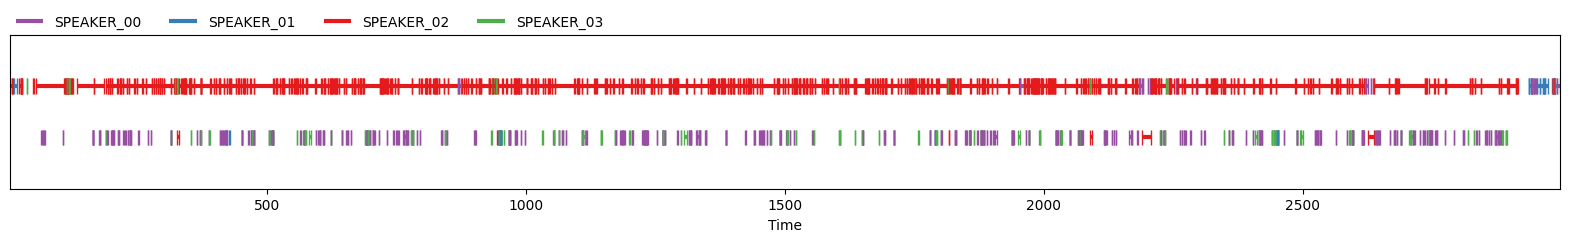

In [1]:
import json
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "2"
with open("secrets.json") as f:
    secrets = json.load(f)
secrets.keys()
import torch
from pyannote.audio import Pipeline
pipeline = Pipeline.from_pretrained(
  "pyannote/speaker-diarization-3.1",
  use_auth_token=secrets["hf_token"]).to(torch.device("cuda"))

# run the pipeline on an audio file
diarization = pipeline("data/audio_16khz_mono_wav/0.wav", min_speakers=2, max_speakers=4)
diarization

In [2]:
str_to_write = diarization.to_rttm()
from pathlib import Path
Path("data/diarization/").mkdir(exist_ok=True)
outpath = Path("data/diarization/0.rttm")
if outpath.exists():
    outpath.unlink()
outpath.write_text(str_to_write)

54536

In [3]:
print(diarization.to_rttm())

SPEAKER 0 1 3.862 4.126 <NA> <NA> SPEAKER_02 <NA> <NA>
SPEAKER 0 1 8.531 0.815 <NA> <NA> SPEAKER_02 <NA> <NA>
SPEAKER 0 1 10.671 6.689 <NA> <NA> SPEAKER_01 <NA> <NA>
SPEAKER 0 1 21.944 2.818 <NA> <NA> SPEAKER_02 <NA> <NA>
SPEAKER 0 1 24.932 0.934 <NA> <NA> SPEAKER_02 <NA> <NA>
SPEAKER 0 1 25.951 1.545 <NA> <NA> SPEAKER_02 <NA> <NA>
SPEAKER 0 1 27.750 0.119 <NA> <NA> SPEAKER_02 <NA> <NA>
SPEAKER 0 1 37.547 0.068 <NA> <NA> SPEAKER_03 <NA> <NA>
SPEAKER 0 1 48.616 0.628 <NA> <NA> SPEAKER_02 <NA> <NA>
SPEAKER 0 1 54.694 53.107 <NA> <NA> SPEAKER_02 <NA> <NA>
SPEAKER 0 1 64.032 1.019 <NA> <NA> SPEAKER_00 <NA> <NA>
SPEAKER 0 1 67.716 1.138 <NA> <NA> SPEAKER_00 <NA> <NA>
SPEAKER 0 1 70.042 0.458 <NA> <NA> SPEAKER_00 <NA> <NA>
SPEAKER 0 1 105.713 0.509 <NA> <NA> SPEAKER_00 <NA> <NA>
SPEAKER 0 1 110.076 0.662 <NA> <NA> SPEAKER_02 <NA> <NA>
SPEAKER 0 1 111.316 0.577 <NA> <NA> SPEAKER_02 <NA> <NA>
SPEAKER 0 1 112.470 1.935 <NA> <NA> SPEAKER_02 <NA> <NA>
SPEAKER 0 1 114.406 0.051 <NA> <NA> SPEAKER_0